In [1]:
from keras import models
from keras import layers

# Case III. Fine tuning
# Retrain a top block of VGG16 convolutional base layers.
base_model_path = './dogs_and_cats_vgg16_with_augmented_samples_1.h5'
base_model = models.load_model(base_model_path)
base_model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


/home/guhwanbae/anaconda3/envs/gu-keras/lib/python3.6/site-packages/keras/engine/saving.py:327: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [2]:
conv_base = base_model.get_layer('vgg16')
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [3]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [4]:
from keras import optimizers

# Reduce a learning rate to update little by little.
base_model.compile(loss='binary_crossentropy',
                   optimizer=optimizers.RMSprop(lr=1e-5),
                   metrics=['acc'])

In [5]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


In [6]:
from keras.preprocessing.image import ImageDataGenerator

# Augmented samples generator.
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

# Test and validation dataset must keep integrity.
validation_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
import os

dataset_dir = '/home/guhwanbae/workspace/machine-learning/resource/cats-and-dogs-small'
train_dir = os.path.join(dataset_dir, 'train')
validation_dir = os.path.join(dataset_dir, 'validation')
test_dir = os.path.join(dataset_dir, 'test')

In [8]:
input_shape = (150, 150)

# Make labels.
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=input_shape,
                                                    batch_size=20,
                                                    class_mode='binary')
validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              target_size=input_shape,
                                                              batch_size=20,
                                                              class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
history = base_model.fit_generator(train_generator,
                                   steps_per_epoch=100,
                                   epochs=100,
                                   validation_data=validation_generator,
                                   validation_steps=50)

Epoch 1/100
100/100 [==============================] - 30s 299ms/step - loss: 0.2870 - acc: 0.8800 - val_loss: 0.2331 - val_acc: 0.9100
Epoch 2/100
100/100 [==============================] - 27s 266ms/step - loss: 0.2580 - acc: 0.8970 - val_loss: 0.2171 - val_acc: 0.9200
Epoch 3/100
100/100 [==============================] - 27s 266ms/step - loss: 0.2151 - acc: 0.8975 - val_loss: 0.2188 - val_acc: 0.9220
Epoch 4/100
100/100 [==============================] - 27s 266ms/step - loss: 0.2102 - acc: 0.9125 - val_loss: 0.2068 - val_acc: 0.9230
Epoch 5/100
100/100 [==============================] - 27s 266ms/step - loss: 0.2149 - acc: 0.9135 - val_loss: 0.2397 - val_acc: 0.9050
Epoch 6/100
100/100 [==============================] - 27s 266ms/step - loss: 0.1989 - acc: 0.9205 - val_loss: 0.2928 - val_acc: 0.8890
Epoch 7/100
100/100 [==============================] - 27s 266ms/step - loss: 0.1827 - acc: 0.9290 - val_loss: 0.2061 - val_acc: 0.9170
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 27s 267ms/step - loss: 0.0280 - acc: 0.9920 - val_loss: 0.2273 - val_acc: 0.9390
Epoch 62/100
100/100 [==============================] - 27s 267ms/step - loss: 0.0338 - acc: 0.9890 - val_loss: 0.2543 - val_acc: 0.9400
Epoch 63/100
100/100 [==============================] - 27s 266ms/step - loss: 0.0268 - acc: 0.9915 - val_loss: 0.3743 - val_acc: 0.9260
Epoch 64/100
100/100 [==============================] - 27s 266ms/step - loss: 0.0302 - acc: 0.9885 - val_loss: 0.2407 - val_acc: 0.9440
Epoch 65/100
100/100 [==============================] - 27s 267ms/step - loss: 0.0388 - acc: 0.9875 - val_loss: 0.2325 - val_acc: 0.9340
Epoch 66/100
100/100 [==============================] - 27s 266ms/step - loss: 0.0367 - acc: 0.9840 - val_loss: 0.2297 - val_acc: 0.9420
Epoch 67/100
100/100 [==============================] - 27s 267ms/step - loss: 0.0292 - acc: 0.9895 - val_loss: 0.2468 - val_acc: 0.9370
Epoch 68/100
100/100 [===================

In [10]:
base_model.save('dogs_and_cats_vgg16_fine_tuning_2.h5')

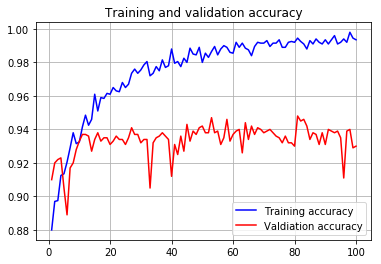

In [14]:
import numpy as np
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = np.arange(len(acc)) + 1

plt.figure('Accuracy')
plt.title('Training and validation accuracy')
plt.plot(epochs, acc, color='b', label='Training accuracy')
plt.plot(epochs, val_acc, color='r', label='Valdiation accuracy')
plt.legend()
plt.grid()
plt.show()

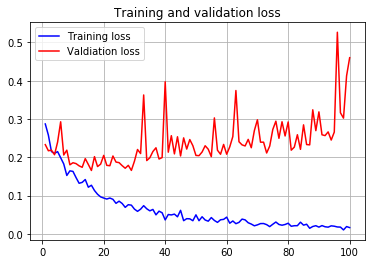

In [15]:
plt.figure('Loss')
plt.title('Training and validation loss')
plt.plot(epochs, loss, color='b', label='Training loss')
plt.plot(epochs, val_loss, color='r', label='Valdiation loss')
plt.legend()
plt.grid()
plt.show()

In [19]:
def smooth_curve(points, factor=0.8):
    smoothed = []
    for p in points:
        if smoothed:
            prev = smoothed[-1]
            smoothed.append(prev*factor + p*(1-factor))
        else:
            smoothed.append(p)
    return smoothed

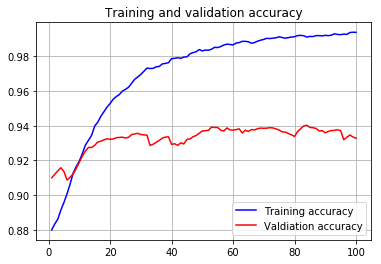

In [20]:
plt.figure('Smoothing accuracy')
plt.title('Training and validation accuracy')
plt.plot(epochs, smooth_curve(acc), color='b', label='Training accuracy')
plt.plot(epochs, smooth_curve(val_acc), color='r', label='Valdiation accuracy')
plt.legend()
plt.grid()
plt.show()

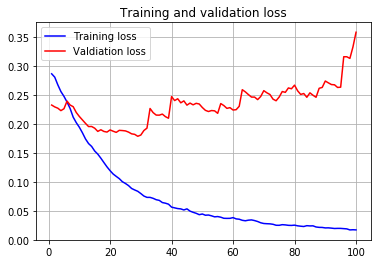

In [21]:
plt.figure('Smoothing loss')
plt.title('Training and validation loss')
plt.plot(epochs, smooth_curve(loss), color='b', label='Training loss')
plt.plot(epochs, smooth_curve(val_loss), color='r', label='Valdiation loss')
plt.legend()
plt.grid()
plt.show()